In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
#load the dataset 
df = pd.read_csv('customer_data.csv')

#display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

#display basic information about the dataset
print("\nDataset Info:")
print(df.info())

#check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())


First 5 rows of the dataset:
   Customer ID  Age  Annual Income  Spending Score
0            1   56          81228              84
1            2   69         134752              30
2            3   46          68984              62
3            4   32          60774              75
4            5   60          22568              92

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     35 non-null     int64
 1   Age             35 non-null     int64
 2   Annual Income   35 non-null     int64
 3   Spending Score  35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB
None

Missing values in dataset:
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64


In [3]:
features = df[['Age','Annual Income','Spending Score']]

#standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#display the first few rows of the standardized data 
print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])



First 5 rows of scaled features:
[[ 0.95357952  0.10285656  1.05310611]
 [ 1.92422534  1.47640368 -0.83350105]
 [ 0.20692889 -0.21135222  0.28448838]
 [-0.838382   -0.42203942  0.73867159]
 [ 1.25223977 -1.40249195  1.33260347]]


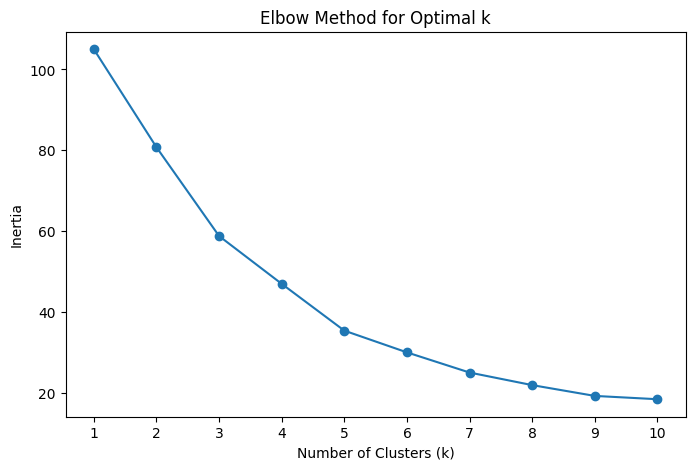

In [5]:
#elbow method to find optimal number of clusters
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

#plot the elbow method graph
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()


In [6]:
#perform k-means clustering with the optimal k (from the elbow method, assume k=3 here)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

#add clustr labels to the original dataset
df['Cluster'] = cluster_labels

#display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels:")
print(df.head())



First 5 rows with cluster labels:
   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   56          81228              84        0
1            2   69         134752              30        2
2            3   46          68984              62        0
3            4   32          60774              75        1
4            5   60          22568              92        0


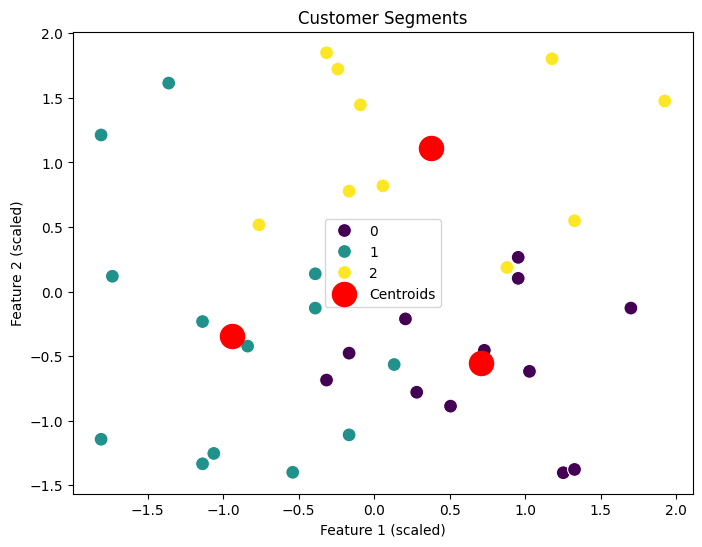

In [7]:
#visualize clusters(using the first two features for plotting)
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()
